# Introduction

To detect correlation in time series a number of methods can be used.

Remember correlation is not causation and bad analysis of time series trends can leave you thinking spurious relationships exist. There are loads of examples here...(http://www.tylervigen.com/spurious-correlations).

## Cross correlation

Aimed at finding if correlation exists between two time series, lagged or unlagged.

1. two independent random series


Here we simulate 200 time series with 100 observations in each series. We use numpys correlation coefficient function to calculate the pearson product moment corelation between all the series. i.e. it returns a 200x200 matrix

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
ntrials = 200
npts = 100

np.random.seed(1234)
y = np.random.rand(ntrials, npts)  # uniform distribution
ccoef = np.corrcoef(y)
print('The shape of y is %s, the shape of ccoef is %s.' 
      % (y.shape, ccoef.shape))


# we want all of the values except for the diagonal. the diagonals will just be = 1 as series should correlate with themselves.
di = np.diag_indices(ntrials)
ccoef = np.ma.asarray(ccoef)
ccoef[di] = np.ma.masked
ccoef_flat = ccoef.compressed()
ccoef_flat

ModuleNotFoundError: No module named 'seaborn'

## Auto Correlation

A time series is said to be auto correlated if it is correlated with a lagged version of itself.

So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

## Trends vs Periodicity

A trend is often considered to be the long term direction of a series.

Periodicity is considered if a time series repeats itself at regular intervals, say every 12 months.

In [19]:
df=pd.read_csv('fitness_trends.csv')
df.columns = ['month', 'diet', 'gym', 'finance']

df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

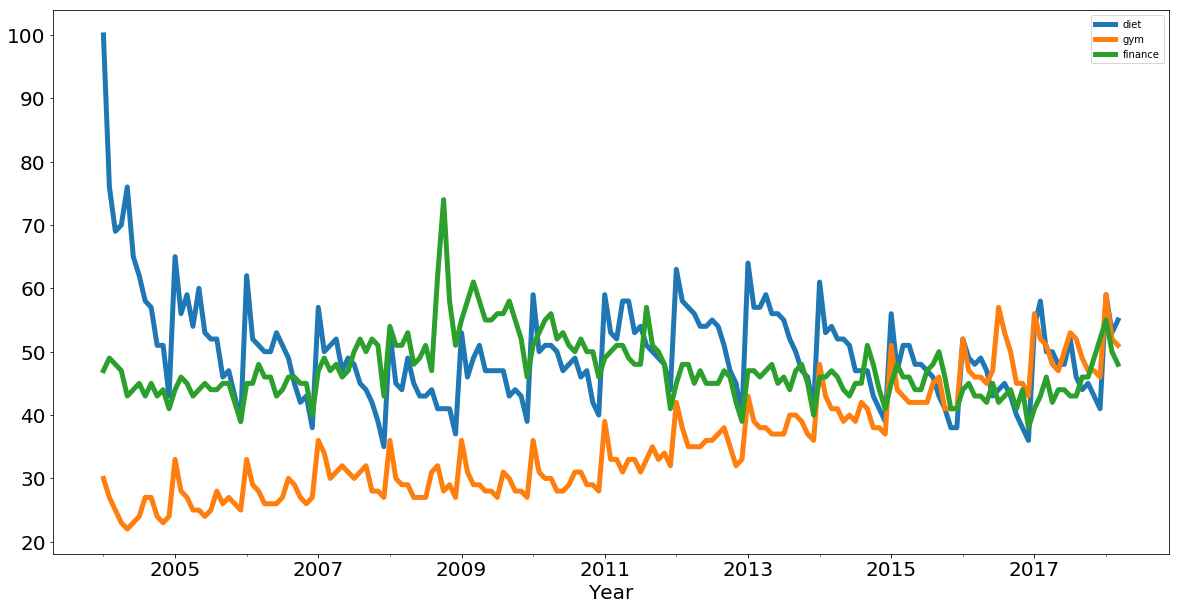

In [20]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Trends are often identified using a rolling average of points. Taking diet into consideration we can use pandas's rolling function to take the average of 12 months.

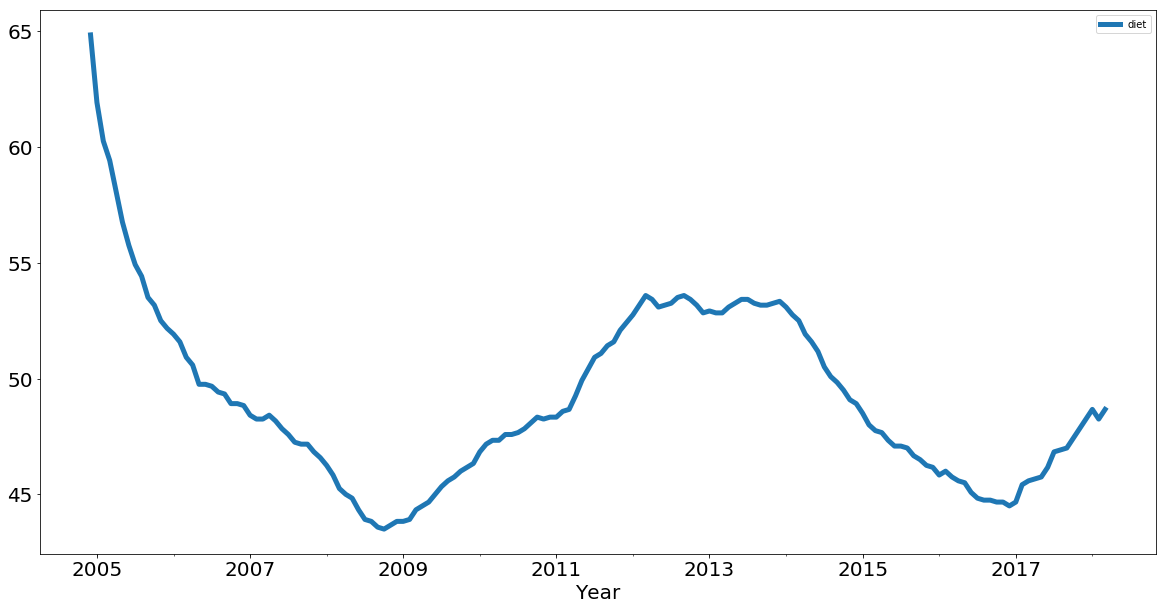

In [21]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In order to look at seasonality in a time series we must substract the trend element. This can be done in two ways the first is by removing the computed mean and the second is to take the difference (lag) of the series. Pandas has a diff function to do this.

We see peaks in January each year when looking at the first order difference.

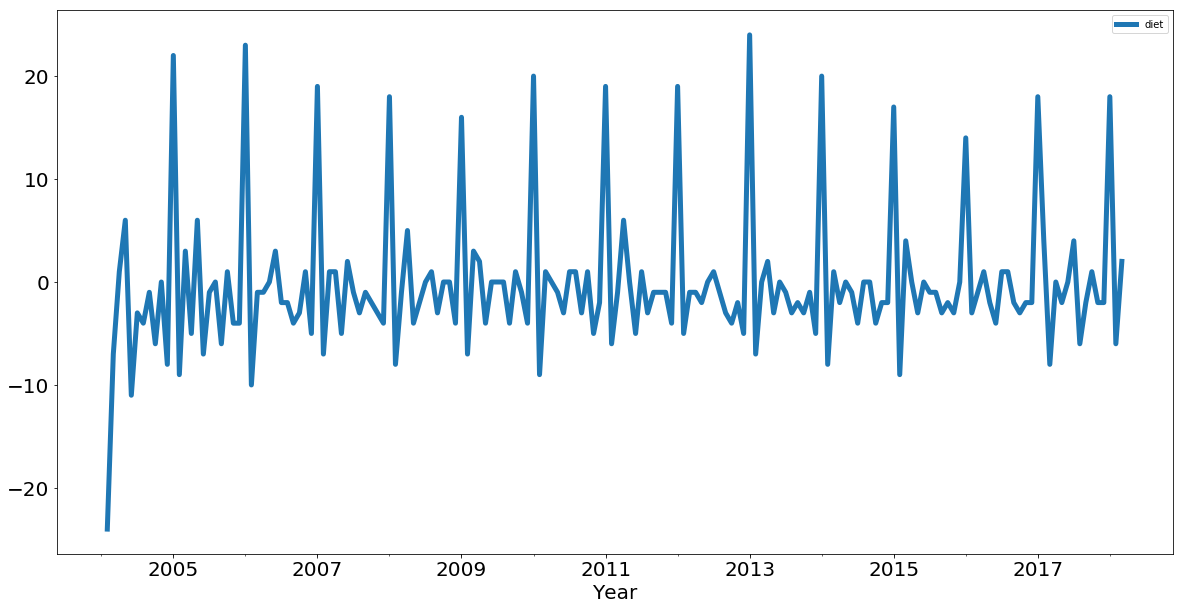

In [27]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [41]:
np.correlate(v=df)

TypeError: correlate() missing 1 required positional argument: 'a'

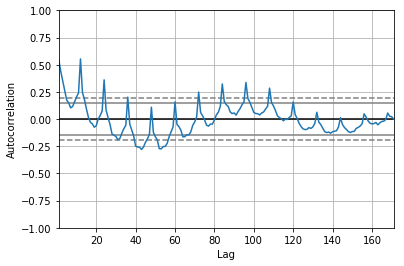

In [35]:
pd.plotting.autocorrelation_plot(diet);

In [ ]:
##REFERENCES

http://www.abs.gov.au/websitedbs/D3310114.nsf/home/Time+Series+Analysis:+The+Basics
        https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial